# Project: Environmental Toxic Analysis in River Systems

## Introduction : 
This report examines toxin concentrations across five major river systems: Yangtze, Nile, Mississippi, Danube, and Amazon over a five-year period from 2018 to 2023, using bar and line chart data among others. It highlights the varying pollution levels among the rivers and the recommendations put forward to help control the levels of toxins in the rivers. 

## 1. Import Required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression


## 2. Load the Dataset

In [3]:
df = pd.read_csv("National_River_Toxin_Dataset_1.csv")
df

,Date,River_System,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
0,2018-01-01,Amazon,7.030015,19.136212,2.500401,0.465454,3.578886,11.627614,0.522167,7.830196
1,2018-01-01,Nile,7.421766,21.406824,3.469443,0.859716,5.352155,10.538171,0.510465,8.130328
2,2018-01-01,Yangtze,7.133612,18.419902,3.806935,0.824085,5.277814,7.865033,0.585096,8.120874
3,2018-01-01,Mississippi,7.863001,18.014871,3.438131,0.500597,3.473881,11.143068,0.438248,6.853816
4,2018-01-01,Danube,7.527686,16.622289,2.188210,0.424178,2.454209,8.043467,0.422244,8.197925
...,...,...,...,...,...,...,...,...,...,...
1300,2022-12-26,Amazon,NaN,21.760533,1.656464,0.466371,2.778257,8.932392,0.521475,8.789334
1301,2022-12-26,Nile,7.214448,21.005255,1.395876,0.743100,4.243743,7.766917,0.624352,7.907600
1302,2022-12-26,Yangtze,6.852077,18.841392,3.677048,0.634460,5.958020,9.855321,0.567842,10.983113
1303,2022-12-26,Mississippi,7.923046,18.886274,3.229030,0.526015,3.904349,10.859932,0.498410,8.284721


## 3. Data Exploration

### 3.1: Check the shape of the DataFrame

In [4]:
df.shape

(1305, 10)

### 3.2: Display info about the DataFrame using info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1305 non-null   object 
 1   River_System      1305 non-null   object 
 2   pH_Level          1278 non-null   float64
 3   Temperature       1278 non-null   float64
 4   Lead              1285 non-null   float64
 5   Mercury           1278 non-null   float64
 6   Arsenic           1279 non-null   float64
 7   Nitrates          1265 non-null   float64
 8   Phosphates        1282 non-null   float64
 9   Dissolved_Oxygen  1284 non-null   float64
dtypes: float64(8), object(2)
memory usage: 102.1+ KB


### 3.3 Generative descriptive statistics using describe()

In [6]:
df.describe()

,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
count,1278.000000,1278.000000,1285.000000,1278.000000,1279.000000,1265.000000,1282.000000,1284.000000
mean,7.353247,20.041668,3.011035,0.596108,3.597916,10.038789,0.497162,8.023795
std,0.349114,4.063638,0.874431,0.175150,0.992052,2.096641,0.106304,1.064190
min,6.465087,9.891618,0.551349,0.157117,1.485608,2.025075,0.144044,5.041394
25%,7.101324,16.813976,2.366298,0.462683,2.836160,8.701188,0.422006,7.269386
50%,7.339326,20.039121,3.000714,0.599186,3.511678,10.089112,0.497631,8.007448
75%,7.585733,23.358634,3.676560,0.734863,4.298946,11.391686,0.572888,8.740828
max,8.392902,30.749449,5.800963,1.057494,6.232902,16.547073,0.870007,11.228677


## 4. Data Cleaning

### 4.1: Check for missing values

In [8]:
print(df.isna().sum())

Date                 0
River_System         0
pH_Level            27
Temperature         27
Lead                20
Mercury             27
Arsenic             26
Nitrates            40
Phosphates          23
Dissolved_Oxygen    21
dtype: int64


### 4.2 Handle any missing or inconsistent data

In [9]:
columns_to_fill = [
    "pH_Level", "Temperature", "Lead", "Mercury", "Arsenic",
    "Nitrates", "Phosphates", "Dissolved_Oxygen"
]

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())

print(df.isna().sum())


Date                0
River_System        0
pH_Level            0
Temperature         0
Lead                0
Mercury             0
Arsenic             0
Nitrates            0
Phosphates          0
Dissolved_Oxygen    0
dtype: int64


In [10]:
df["Date"] = pd.to_datetime(df["Date"])

## 5. Basic Analysis

### 5.1 Calculating average toxin levels for each river system

In [11]:
Average_toxin_level = df.groupby("River_System")[["Lead", "Mercury", "Arsenic"]].mean()
Average_toxin_level 

,Lead,Mercury,Arsenic
River_System,,,
Amazon,2.030662,0.493555,3.021498
Danube,2.544912,0.397276,2.517318
Mississippi,3.478198,0.598506,3.492969
Nile,2.990203,0.706638,3.987877
Yangtze,4.011200,0.784567,4.969918


### 5.2 Rivers and their concentration of Lead

In [12]:
top_pollutedlead_rivers = df.groupby("River_System")["Lead"].sum().sort_values(ascending = False).reset_index()
top_pollutedlead_rivers

,River_System,Lead
0,Yangtze,1046.923320
1,Mississippi,907.809620
2,Nile,780.443013
3,Danube,664.222147
4,Amazon,530.002899


### 5.3 Rivers and their concentration of Mercury

In [13]:
top_pollutedMerc_rivers = df.groupby("River_System")["Mercury"].sum().sort_values(ascending = False).reset_index()
top_pollutedMerc_rivers

,River_System,Mercury
0,Yangtze,204.772103
1,Nile,184.432569
2,Mississippi,156.209962
3,Amazon,128.817837
4,Danube,103.689082


### 5.4 Rivers and their concentration of Arsenic

In [14]:
top_pollutedArsen_rivers = df.groupby("River_System")["Arsenic"].sum().sort_values(ascending = False).reset_index()
top_pollutedArsen_rivers

,River_System,Arsenic
0,Yangtze,1297.148554
1,Nile,1040.835841
2,Mississippi,911.664987
3,Amazon,788.610886
4,Danube,657.019903


### 5.5 Correlation between toxins and pH Levels

In [15]:
toxic_conc = df[["Arsenic", "Mercury"]].sum()


df["Arsenic"] = pd.to_numeric(df["Arsenic"], errors = "coerce")
df["Mercury"] = pd.to_numeric(df["Mercury"], errors = "coerce")
df["Lead"] = pd.to_numeric(df["Lead"], errors = "coerce")
df["pH_Level"] = pd.to_numeric(df["pH_Level"], errors = "coerce")

pH_Arsenic_corr = df[["Arsenic", "pH_Level"]].corr().iloc[0,1]
pH_Mercury_corr = df[["Mercury", "pH_Level"]].corr().iloc[0,1]
pH_Lead_corr = df[["Lead", "pH_Level"]].corr().iloc[0,1]

print(f"Correlation between Arsenic and pH levels: {pH_Arsenic_corr},\n"
       f"Correlation between Mercury and pH levels: {pH_Mercury_corr},\n"
       f"Correlation between Lead and pH levels: {pH_Lead_corr}")

Correlation between Arsenic and pH levels: 0.04251382134895336,
Correlation between Mercury and pH levels: 0.1376563667008101,
Correlation between Lead and pH levels: 0.3196997547410924


## 6. Data Visualization

### 6.1 Bar charts of average toxin concentration by river system

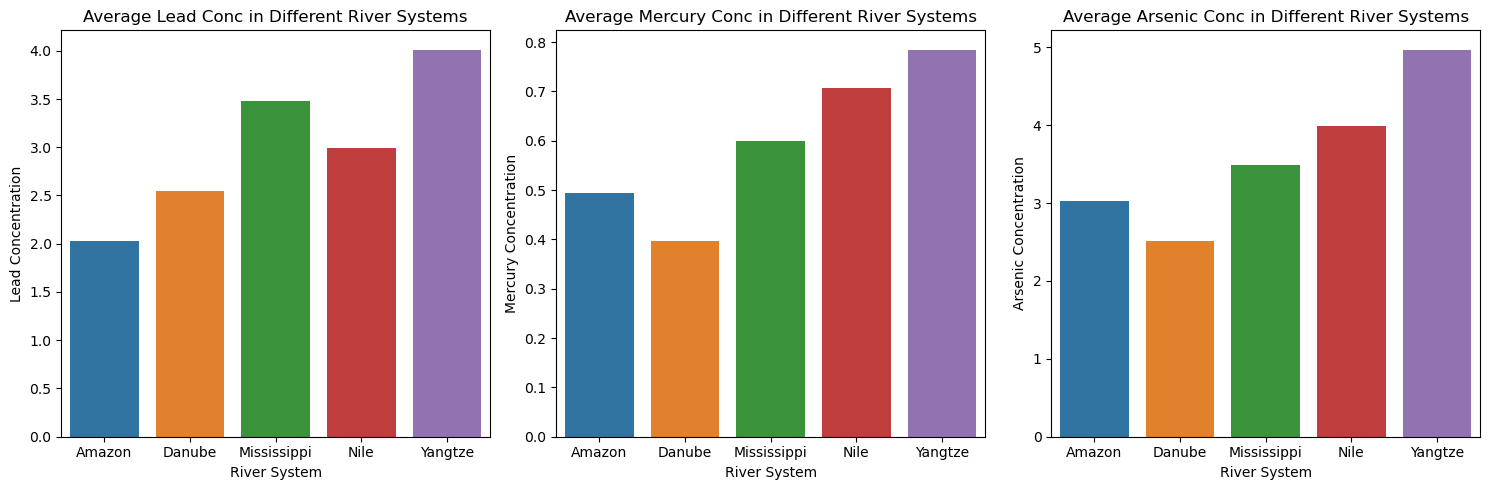

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x = Average_toxin_level.index, y = "Lead", data = Average_toxin_level, ax = axes[0])
axes[0].set_title("Average Lead Conc in Different River Systems")
axes[0].set_xlabel("River System")
axes[0].set_ylabel("Lead Concentration")

sns.barplot(x = Average_toxin_level.index, y = "Mercury", data = Average_toxin_level, ax = axes[1])
axes[1].set_title("Average Mercury Conc in Different River Systems")
axes[1].set_xlabel("River System")
axes[1].set_ylabel("Mercury Concentration")

sns.barplot(x = Average_toxin_level.index, y = "Arsenic", data = Average_toxin_level, ax = axes[2])
axes[2].set_title("Average Arsenic Conc in Different River Systems")
axes[2].set_xlabel("River System")
axes[2].set_ylabel("Arsenic Concentration")

fig.tight_layout()
plt.show()



The bar charts above show the average toxin concentration across five different river systems. Yangtze constantly ranks the top of the list of being the most polluted among the 5 rivers. The Yangtze river flows through some of China's largest cities therefore waste from these cities end up in this river hence its high level of pollution The Nile and Mississippi river fluctuate between second and third place. The Danube and Amazon are the least polluted out of all the rivers fluctuating between fourth and fifth place. Large stretches of the Amazon are still remote and forested as a result experience lower population and industrial density reasons why it is on of the least polluted.

### 6.2 Line Graph of Toxin Levels over time for each river system

In [17]:
df["Month-Year"] = df["Date"].dt.to_period("M")

In [18]:
toxin_data = df.groupby(["Date", "River_System"])[["Lead", "Mercury", "Arsenic"]].sum().reset_index()
toxin_data

,Date,River_System,Lead,Mercury,Arsenic
0,2018-01-01,Amazon,2.500401,0.465454,3.578886
1,2018-01-01,Danube,2.188210,0.424178,2.454209
2,2018-01-01,Mississippi,3.438131,0.500597,3.473881
3,2018-01-01,Nile,3.469443,0.859716,5.352155
4,2018-01-01,Yangtze,3.806935,0.824085,5.277814
...,...,...,...,...,...
1300,2022-12-26,Amazon,1.656464,0.466371,2.778257
1301,2022-12-26,Danube,2.031249,0.257309,3.026691
1302,2022-12-26,Mississippi,3.229030,0.526015,3.904349
1303,2022-12-26,Nile,1.395876,0.743100,4.243743


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

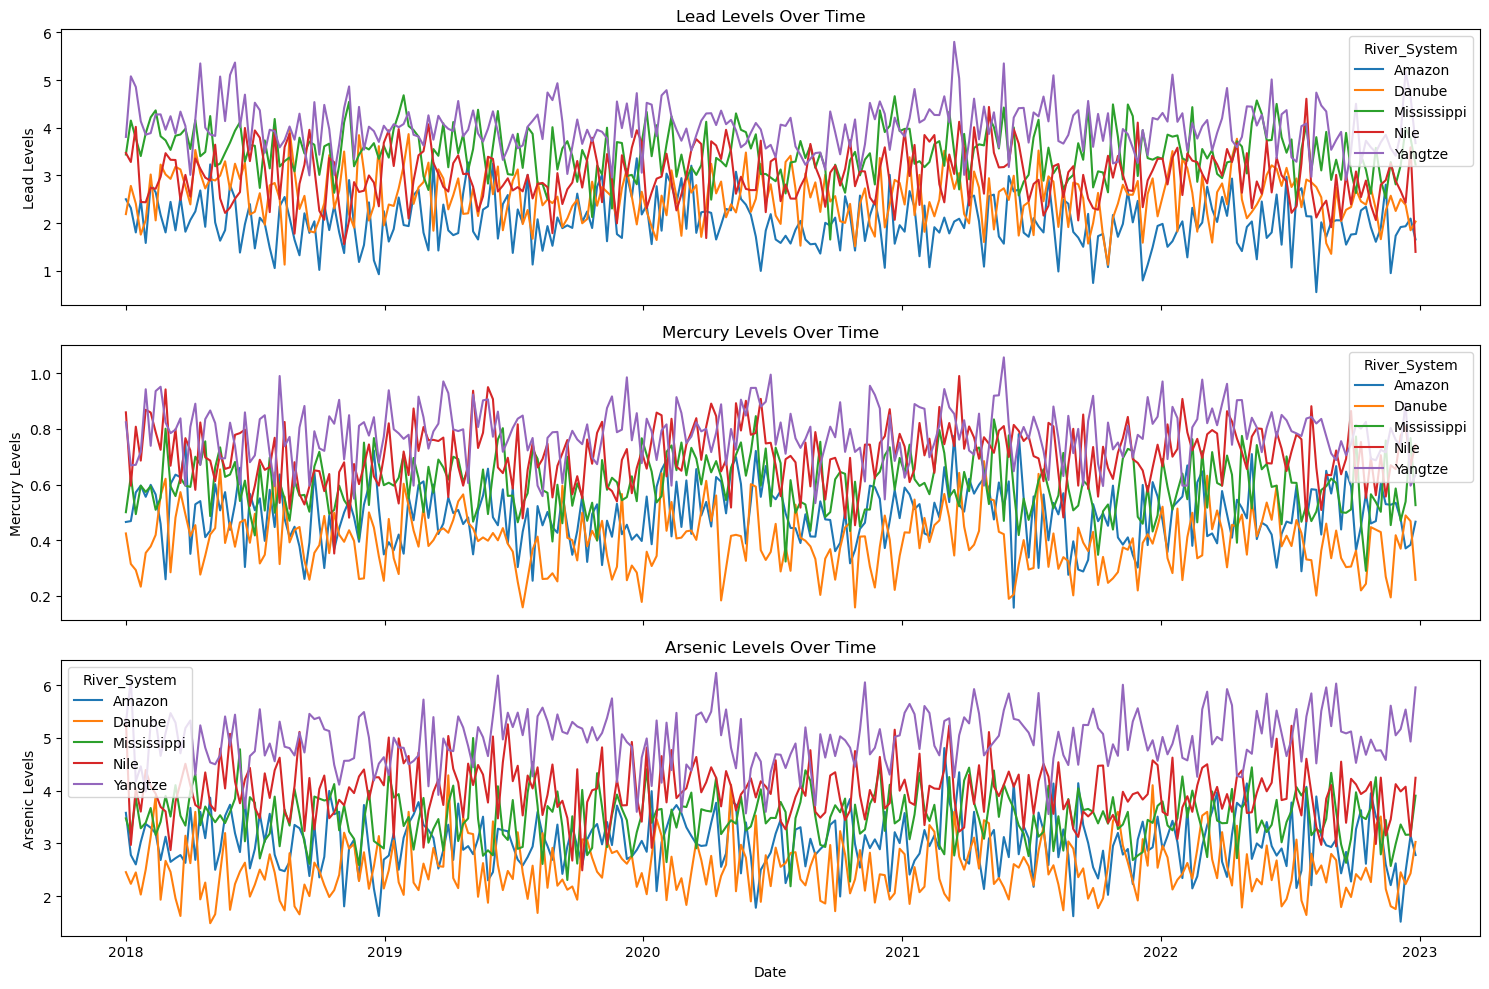

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

# Plot 1: Lead
sns.lineplot(data=toxin_data, x="Date", y="Lead", hue="River_System", ax=ax[0], legend=True)
ax[0].set_title("Lead Levels Over Time")
ax[0].set_ylabel("Lead Levels")

# Plot 2: Mercury
sns.lineplot(data=toxin_data, x="Date", y="Mercury", hue="River_System", ax=ax[1], legend=True)
ax[1].set_title("Mercury Levels Over Time")
ax[1].set_ylabel("Mercury Levels")

# Plot 3: Arsenic
sns.lineplot(data=toxin_data, x="Date", y="Arsenic", hue="River_System", ax=ax[2], legend=True)
ax[2].set_title("Arsenic Levels Over Time")
ax[2].set_ylabel("Arsenic Levels")

plt.tight_layout()
plt.show()


The three line graphs above portray the toxin levels in each of the rivers over time. It is clear that there is rapid fluctuation in all of the toxin levels throughout short periods of times however over the five year period of 2018 to 2023, there does not seem to be any noticeable increase of toxin levels in these rivers.

### 6.3 Heatmap of correlations between different toxin and pH Levels

In [162]:
df_corr = df.select_dtypes(include = "number").corr()
df_corr

,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
pH_Level,1.000000,0.167589,0.319700,0.137656,0.042514,0.082121,0.089348,-0.058682
Temperature,0.167589,1.000000,0.124512,0.160928,0.044863,0.246166,0.314542,-0.279058
Lead,0.319700,0.124512,1.000000,0.538168,0.566595,0.029522,-0.000937,-0.027448
Mercury,0.137656,0.160928,0.538168,1.000000,0.685925,0.062318,0.005734,-0.001926
Arsenic,0.042514,0.044863,0.566595,0.685925,1.000000,0.034924,-0.004483,0.020435
Nitrates,0.082121,0.246166,0.029522,0.062318,0.034924,1.000000,0.099595,-0.092371
Phosphates,0.089348,0.314542,-0.000937,0.005734,-0.004483,0.099595,1.000000,-0.125113
Dissolved_Oxygen,-0.058682,-0.279058,-0.027448,-0.001926,0.020435,-0.092371,-0.125113,1.000000


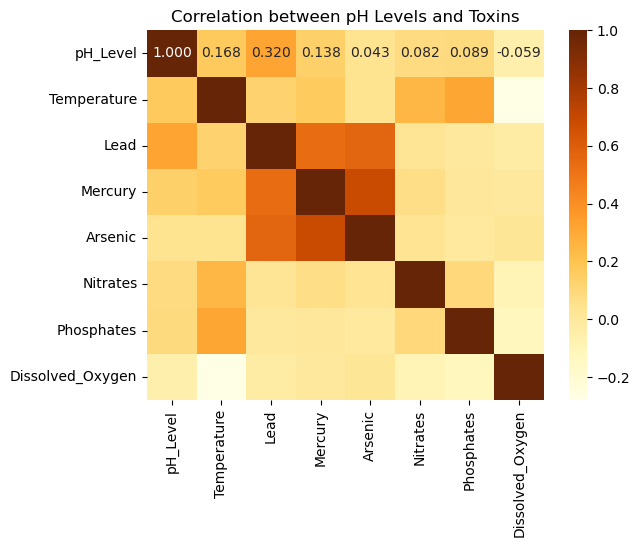

In [179]:
sns.heatmap(df_corr, annot=True, fmt = ".3f", cmap = "YlOrBr")
plt.title("Correlation between pH Levels and Toxins")
plt.show()

The heat map conveys the correlation between the pH levels of all the rivers and the toxins. Mercury and Arsenic both show a correlation of 0.138 and 0.043. They suggest an extremely weak correlation between these two toxins and pH levels therefore showing little to no relationship. Lead however has a correlation of 0.32, Although weak, it indicates a relationship between the two variables, one that is positive. 

## 8. Statistical Analysis

### 8.1. T-Test to compare Lead Levels between the Amazon and Danube rivers

In [26]:
from scipy.stats import ttest_ind

amazon_lead = df[df["River_System"] == "Amazon"]["Lead"]
danube_lead = df[df["River_System"] == "Danube"]["Lead"]

t_stat, p_value = ttest_ind(amazon_lead, danube_lead)
print(f"Lead T-test between the Amazon and Danube : T-Statistic = {t_stat}, P Value = {p_value}")

Lead T-test between the Amazon and Danube : T-Statistic = -11.140670752941029, P Value = 5.349865449161401e-26


### 8.2. A simple Linear Regression to predict lead levels based on pH Levels.

In [27]:
X = df[["pH_Level"]]
y = df[["Lead"]]

model = LinearRegression()
model.fit(X,y)

print(f"Linear Regression Coefficient {model.coef_}, Linear Model Intercept {model.intercept_}")

Linear Regression Coefficient [[0.80294889]], Linear Model Intercept [-2.89324669]


## 9. Summary

The bar and line charts display average toxin concentrations in five major river systems from 2018 to 2023. The Yangtze River consistently ranks as the most polluted, primarily due to its flow through densely populated and industrialized regions in China. The Nile and Mississippi Rivers alternate between second and third, likely influenced by agricultural runoff and urban waste. In contrast, the Danube and Amazon Rivers remain the least polluted, with the Amazon benefiting from its remote, forested environment and low industrial activity. Although short-term fluctuations in toxin levels are evident, there is no significant long-term increase in pollution over the five-year period. A weak positive correlation of 0.32 between lead levels and pH suggests that changes in water acidity have minimal influence on lead concentrations in these rivers but the effect is still present nonetheless.

Recommendations:

1. Stronger industrial waste regulations along rivers like the Yangtze and Nile.

2. Investment in wastewater treatment infrastructure to reduce urban discharge.

3. Preservation of natural ecosystems around less-polluted rivers like the Amazon.

4. Regular monitoring and international cooperation to ensure sustained river health